In [1]:
# Recap some stuff
## Dectionary
dec = {1: "Moayyed",
       2: "Astrea",
       3: "Baba",
       4: "Mama",
       5: "Hino"}
print(dec[2])

## Python array(list)
cars = ["Ford", "Volvo", "BMW"]
print(cars)
cars.append("Honda")
print(cars)
array = [1, 2, 3, 4]
print(type(cars), type(array))

## Numpy array
import numpy as np

np_array = np.array([1, 2, 3, 4, 5])
np_cars = np.array(["Ford", "Volvo", "BMW"])
print(np_array.dtype, np_cars.dtype)

Astrea
['Ford', 'Volvo', 'BMW']
['Ford', 'Volvo', 'BMW', 'Honda']
<class 'list'> <class 'list'>
int64 <U5


# Linear Regression `Y = WX + b`
Linear regression is used to predict the value of a variable based on the value of another variable.

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

## Create Data
The dataset used for the linear regression problem is a supervised dataset, consisting of input and output data. We are going to create a linear dataset comprising independent and dependent variables. `X` represents the input data used to train the model, known as the independent variables. `y` is the output variable, and it's the dependent variable because its existence depends on `X`.


In [3]:
# Create parameters
weight = 0.7
bias = 0.3


X = torch.arange(0, 1, step=0.02).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# The number of samples in X and y
len(X), len(y)

(50, 50)

## Split the dataset

In [5]:
# Split the dataset to training and testing dataset, by determing split size
split_size = int(0.8 * len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualize the Data

In [6]:
# Create a function to visulize the data
def plot_predictions(training_data=X_train, training_labels=y_train, testing_data=X_test, testing_labels=y_test, prediction=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(training_data, training_labels, c='b', label="Training Data")  # c for color
  plt.scatter(testing_data, testing_labels, c='g', label="Testing label")

  if prediction is not None:
    # Plot the predictions if they exist
    plt.scatter(testing_data, prediction, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 10});

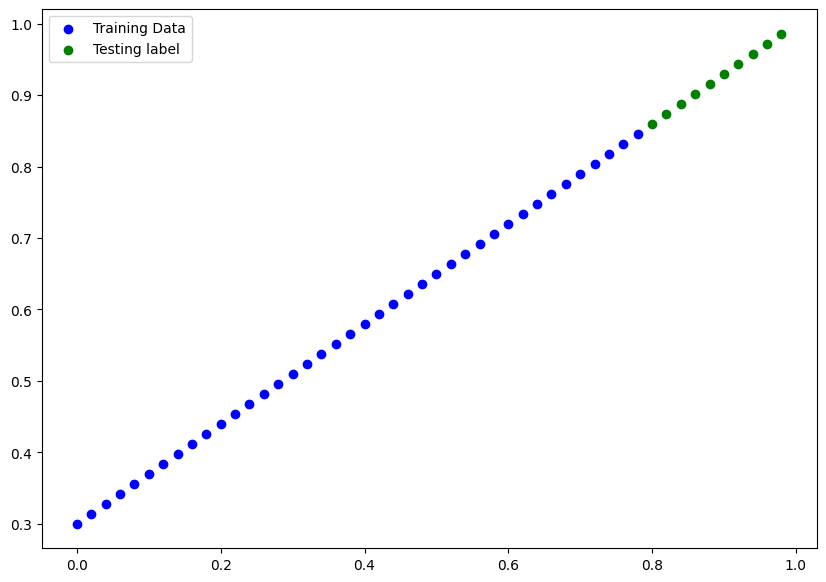

In [7]:
plot_predictions(X_train, y_train, X_test, y_test)

## Model

### Build the model class
We aim to develop a linear regression model and train it using X and y. The process involves feeding the model the input samples (`X`) and allowing it to generate predictions. The model then compares these predictions with the actual values in `y`. During this process, it tunes its parameters (`W` for weights, `b` for bias) and iteratively predicts the inputs again, each time refining its predictions by comparing them with the actual outputs. This process repeats until the model achieves a satisfactory level of accuracy in predicting input values. Once trained, we can test the model on data with a similar pattern and eventually deploy it in a product.

In [8]:
from torch import nn
class LinearRegresionModel(nn.Module):  # Base class for all neural network modules
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias   # Linear regresion formula

In [9]:
torch.manual_seed(42)  # Set the random seed to get the same random number every time

# Check the model parameters
model_0 = LinearRegresionModel()

#check out parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
# Make prediction using the model befors training
with torch.inference_mode():   #turns off gradinte traking and make code runs faster
  y_preds = model_0(X_test)

# # You can also do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds  # Predicted values

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test  # Real values

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

We can observe that there is a significant difference between the real and predicted values.

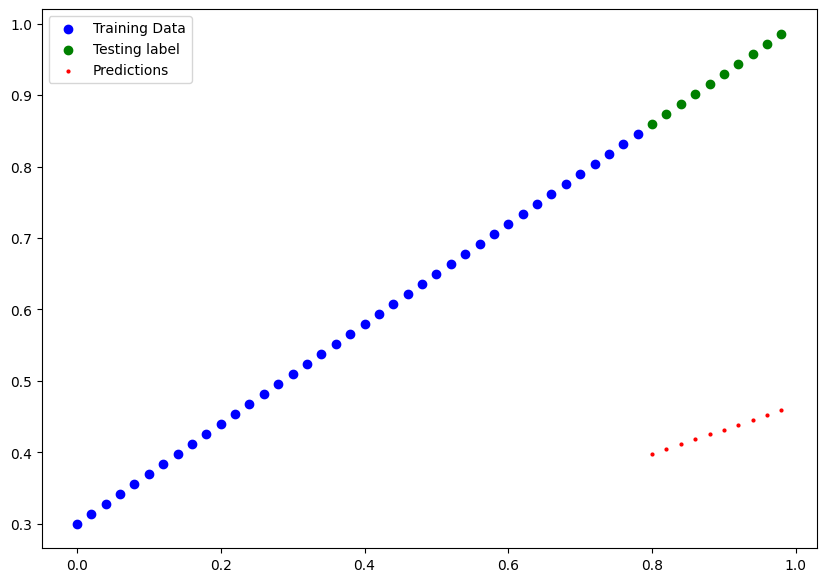

In [13]:
plot_predictions(prediction=y_preds)

The red dots represent the model's predictions before training. As you can see, there is a noticeable difference between them.

### Create a Training loop

In [14]:
# Setup the loss function (MAE) to compute the difference between the predicted and the actual values.
loss_fn = nn.L1Loss()

# Setup the optimizer to optimize the value of the model parameters
optimizer = torch.optim.SGD(model_0.parameters(),
                           lr=0.01)

In [15]:
# An epoch is one loop through the data
epochs = 200

for epoch in range(epochs):
  # Set the model training mode
  model_0.train()   # Train mode in pytorch sets all that requiers gradients to require gradients

  # Forward pass
  y_preds = model_0(X_train)

  # Loss
  loss = loss_fn(y_preds, y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Berform backpropagation on the loss
  loss.backward()

  # Optimizing
  optimizer.step()

  model_0.eval()   # Turn off the differnet settings in the model not needed in evaluation like gradient tracking, dropout and batch norm layer
  with torch.inference_mode():
    model_0_preds = model_0(X_test)
    test_loss = loss_fn(model_0_preds, X_test)

  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | Training Loss: {loss} | Testing Loss {test_loss}")
    print(f"   ...     {model_0.state_dict()}" )

Epoch: 0 | Training Loss: 0.31288138031959534 | Testing Loss 0.4480651915073395
   ...     OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 20 | Training Loss: 0.08908725529909134 | Testing Loss 0.18429657816886902
   ...     OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 40 | Training Loss: 0.04543796554207802 | Testing Loss 0.08060953766107559
   ...     OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 60 | Training Loss: 0.03818932920694351 | Testing Loss 0.05586633086204529
   ...     OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch: 80 | Training Loss: 0.03132382780313492 | Testing Loss 0.03963042423129082
   ...     OrderedDict([('weights', tensor([0.5459])), ('bias', tensor([0.3648]))])
Epoch: 100 | Training Loss: 0.024458957836031914 | Testing Loss 0.027516866102814674
   ...     OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
Epo

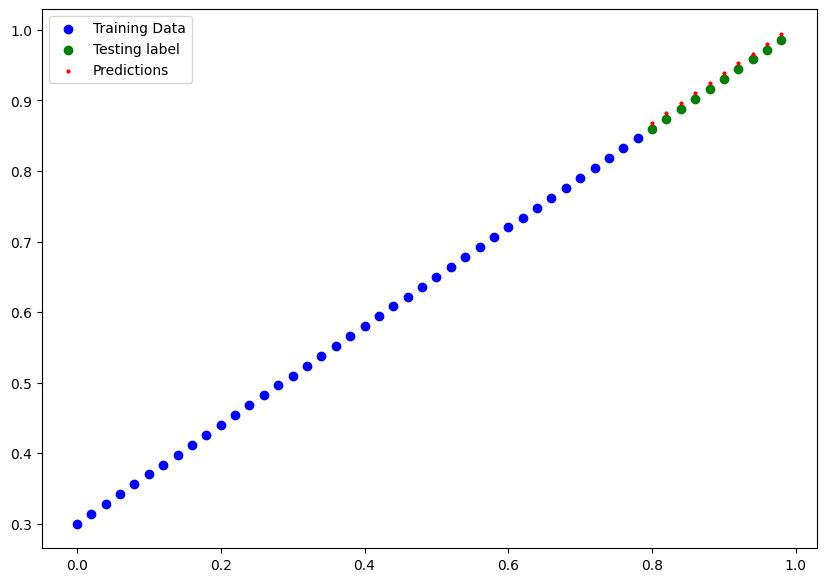

In [16]:
# plot the model prediction next to the true values
plot_predictions(prediction=model_0_preds)

## Save the model

`torch.save()`  -> python's pickle format

`torch.load()`  -> load saved pytorch model

`torch.nn.module.load_state_dict`  ->load model saved state dictionary

In [17]:
# Save the model
from pathlib import Path

# 1. Create a dirctory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok= True)  # exist_ok: it it already exist will not wont throgh us an error

# 2. Create a model path
MODEL_NAME = "01_linear_regresion_model_0.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model
torch.save(model_0.state_dict(),
           MODEL_SAVE_PATH)

## Load the Model Back

In [18]:
loaded_model_0 = LinearRegresionModel()

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [19]:
loaded_model_0.eval()
with torch.inference_mode():
   loaded_model_0_preds= loaded_model_0(X_test)

In [20]:
model_0_preds == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Put Things Together

In [21]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [22]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print (f"device: {device}")

device: cpu


## Cerate Data

In [23]:
# Create another dataset with different parameters
weight = 0.5
bias = 1

X = torch.arange(0, 3, 0.02).unsqueeze(1)
y = weight * X + bias

len(X), len(y)

(150, 150)

## Split the Data

In [24]:
split_size = int(0.8 * len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(120, 120, 30, 30)

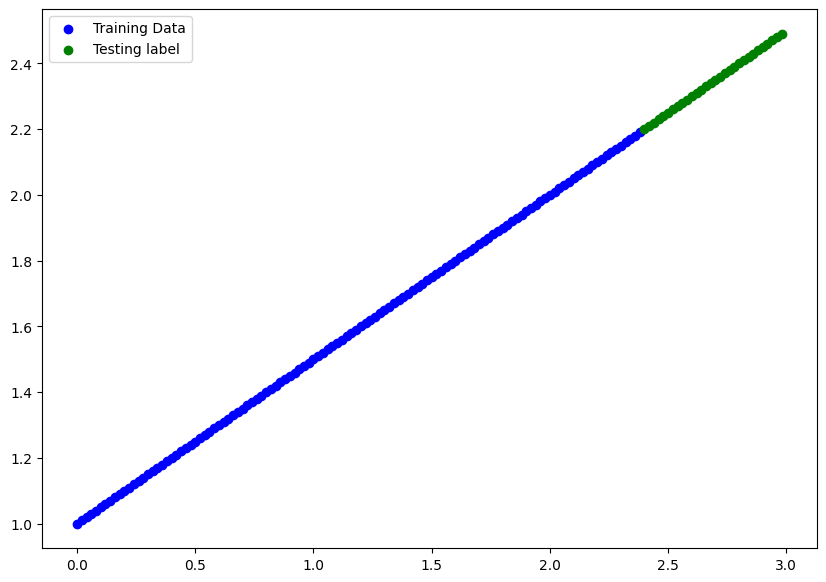

In [25]:
plot_predictions(X_train, y_train, X_test, y_test)

## The Model

### Model Class

In [26]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
         super().__init__()
         # weights = nn.parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
         # bias = nn.parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
         # instead of using the above way we can use a layer that have the parameters in built
         self.linear_layer = nn.Linear(in_features=1, out_features=1) # the size of input and output

    def forward(self, x: torch.Tensor) -> torch.Tensor: # this is python type hint see the link
       return self.linear_layer(x)                       #https://docs.python.org/3/library/typing.html

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [27]:
# The device
next(model_1.parameters()).device

device(type='cpu')

In [28]:
model_1.to(device)
next(model_1.parameters()).device   #will return cuda if the gpu is available

device(type='cpu')

### Model Training

In [29]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.001)

In [30]:
epochs = 1500

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
  # Training ...
  model_1.train()
  y_preds = model_1(X_train)
  loss = loss_fn(y_preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing ...
  model_1.eval()
  with torch.inference_mode():
    model_1_preds = model_1(X_test)
    test_loss = loss_fn(model_1_preds, y_test)
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)

  if epoch % 20 == 0:
    print(f"epoch: {epoch} | Training loss: {loss} | Testing Loss: {test_loss}")
    #print(f"           {model_1.state_dict()}")

epoch: 0 | Training loss: 0.1917456090450287 | Testing Loss: 0.5384388566017151
epoch: 20 | Training loss: 0.16841717064380646 | Testing Loss: 0.47667473554611206
epoch: 40 | Training loss: 0.14829233288764954 | Testing Loss: 0.41931819915771484
epoch: 60 | Training loss: 0.13146944344043732 | Testing Loss: 0.36694595217704773
epoch: 80 | Training loss: 0.11783432215452194 | Testing Loss: 0.3201832175254822
epoch: 100 | Training loss: 0.1071382537484169 | Testing Loss: 0.27938973903656006
epoch: 120 | Training loss: 0.09896793216466904 | Testing Loss: 0.24463336169719696
epoch: 140 | Training loss: 0.09282315522432327 | Testing Loss: 0.2159206122159958
epoch: 160 | Training loss: 0.08816223591566086 | Testing Loss: 0.19290386140346527
epoch: 180 | Training loss: 0.08445320278406143 | Testing Loss: 0.17458780109882355
epoch: 200 | Training loss: 0.08133602887392044 | Testing Loss: 0.1603267341852188
epoch: 220 | Training loss: 0.07852239906787872 | Testing Loss: 0.1489994376897812
epoch

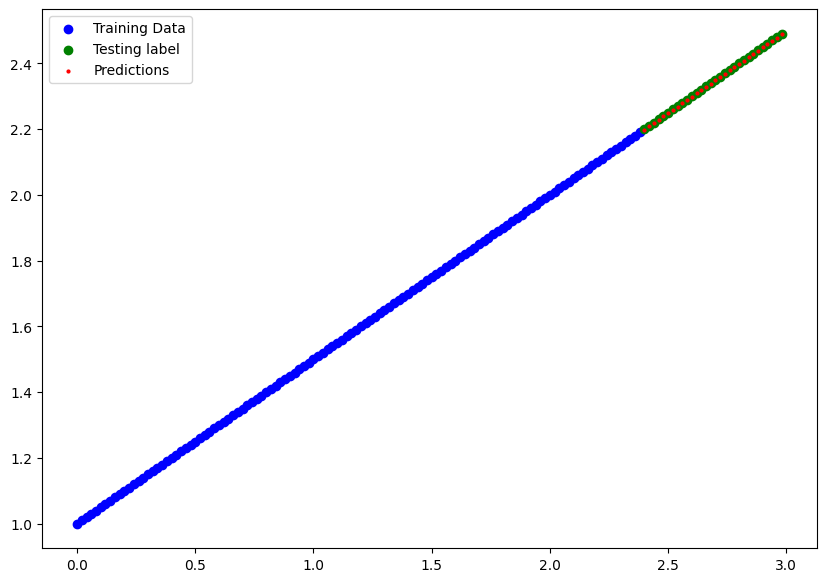

In [31]:
plot_predictions(X_train, y_train, X_test, y_test, prediction=model_1_preds)

## Save and Load

In [32]:
MODEL_NAME = "01_linear_regresion_model_1.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [33]:
# Save the entire model
torch.save(model_1, MODEL_SAVE_PATH)

In [34]:
# Load it back
loaded_model_1 = torch.load(MODEL_SAVE_PATH)
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4999]])),
             ('linear_layer.bias', tensor([0.9990]))])

In [35]:
model_1.state_dict() == loaded_model_1.state_dict()

True